<a href="https://colab.research.google.com/github/vitamin1312/MLc/blob/main/BP_claster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Our modules

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.signal import savgol_filter

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import Birch

from sklearn.cluster import DBSCAN

# Functions

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.title("Dendrogram")
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
def mae(x):
    return np.mean(np.abs(x - x.mean()))

In [ ]:
def find_best_n_clusters(X, method=KMeans):
    best_score = -1
    best_n_clusters = 2

    range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

    for n_clusters in range_n_clusters:
        kmeans = method(n_clusters=n_clusters)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        print(f"n_cluster: {n_clusters}, score: {score}")
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
    return best_n_clusters, best_score

In [ ]:
def corr(x, y):
    assert  len(x) == len(y), "x and y must have the same length"

    x = np.array(x)
    y = np.array(y)

    n = len(x)
    x_mean, y_mean = x.mean(), y.mean()

    return np.dot((x - x_mean), (y - y_mean).T) / np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))

In [ ]:
def get_corr_matrix(X):
    size = len(X)

    corr_matrix = np.array([[0 for _ in range(size)] for _ in range(size)], dtype=np.float64)

    for i in range(size-1):
        for j in range(i+1, size):
            correlation = corr(X[i], X[j])
            # print(f"correlation between {ten_years.Country.iloc[i]} and {ten_years.Country.iloc[j]} is: {corr(X[i], X[j])}")
            corr_matrix[i, j], corr_matrix[j, i] = correlation, correlation

    return corr_matrix

In [ ]:
def euclidean(x: np.array, y: np.array) -> np.float64:
    return np.sqrt(np.sum((x - y)**2))

In [ ]:
def manhattan(x: np.array, y: np.array):
    return np.sum(abs(x - y))

In [ ]:
def cosine(x: np.array, y: np.array) -> np.float64:
    return (x.T @ y) / (np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)))

In [ ]:
def custom_kmeans(X: np.array,
           n_clusters: int,
           n_iter: int = 100,
           ro=euclidean) -> np.array:

    least, great = X.min(), X.max()
    size = len(X)
    ndims = len(X[0])

    clusters = np.zeros(size)

    while True:
        idx = np.random.randint(low=0, high=size, size=n_clusters)
        if len(set(idx)) == n_clusters:
            break

    centers = dict(zip(np.arange(n_clusters), X[idx]))


    for i in range(n_iter):
        for count, vector in enumerate(X):

            distance = np.zeros(n_clusters)

            for cluster, center in centers.items():
                distance[cluster] = ro(vector, center)

            clusters[count] = np.argmin(distance)


        for cluster, center in centers.items():
            centers[cluster] = np.mean(X[clusters == cluster], axis=0)
        print("centers: ", centers)
        print(X)

    return clusters

In [ ]:
len(set(np.array([1, 1, 2])))

2

# Excel table

In [ ]:
data = pd.ExcelFile('https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2022-all-data.xlsx')

In [ ]:
data.sheet_names

['Contents',
 'Primary Energy Consumption',
 'Primary Energy - Cons by fuel',
 'Primary Energy - Cons capita',
 'CO2 Emissions from Energy',
 'CO2 from Flaring',
 'Natural Gas Flaring',
 'CO2e Methane, Process emissions',
 'CO2e Emissions',
 'Oil - Proved reserves',
 'Oil - Proved reserves history',
 'Oil Production - Barrels',
 'Oil Production - Tonnes',
 'Oil Production - Crude Conds',
 'Oil Production - NGLs',
 'Total Liquids - Consumption',
 'Oil Consumption - Barrels',
 'Oil Consumption - Tonnes',
 'Oil Consumption - EJ',
 'Oil - Regional Consumption',
 'Oil - Spot crude prices',
 'Oil crude prices since 1861',
 'Oil - Refinery throughput',
 'Oil - Refining capacity',
 'Oil - Regional refining margins',
 'Oil - Trade movements',
 'Oil - Inter-area movements',
 'Oil - Trade 2020- 2021',
 'Gas - Proved reserves',
 'Gas - Proved reserves history ',
 'Gas Production - Bcm',
 'Gas Production - Bcf',
 'Gas Production - EJ',
 'Gas Consumption - Bcm',
 'Gas Consumption - Bcf',
 'Gas Consu

In [ ]:
df = data.parse("Gas Consumption - EJ", header=2)
df.rename(columns={'Exajoules': 'Country'}, inplace=True)
df.dropna(inplace=True)
df = df.iloc[:-5, :-3]

for index, country in zip(df.index, df.Country):
    if "total" in country.lower():
        df.drop(index, inplace=True)

# Somthing about our data

In [ ]:
df.head()

Country       1965       1966       1967       1968       1969  \
1     Canada   0.780063   0.854010   0.906902   1.009875   1.128587   
2     Mexico   0.290329   0.306408   0.263507   0.282932   0.350894   
3         US  14.973142  16.137922  17.039478  18.240534  19.634785   
6  Argentina   0.148442   0.160766   0.168118   0.187198   0.186498   
7     Brazil   0.001848   0.002161   0.002443   0.002582   0.002721   

        1970       1971       1972       1973  ...       2012       2013  \
1   1.246819   1.330795   1.496861   1.591845  ...   3.579247   3.795865   
2   0.358830   0.372940   0.398807   0.441885  ...   2.651536   2.800622   
3  20.695170  21.335494  21.553072  21.376654  ...  24.772420  25.452822   
6   0.210760   0.227530   0.255328   0.290548  ...   1.643912   1.656997   
7   0.002920   0.004598   0.006314   0.007226  ...   1.172755   1.381780   

        2014       2015       2016       2017       2018       2019  \
1   3.954295   3.971968   3.779613   3.956576   4.162679   4.222535   
2   2.838544   2.908185   2.989081   3.097207   3.153089   3.167039   
3  26.001376  26.768862  26.967562  26.639721  29.581740  30.624902   
6   1.661579   1.679492   1.735560   1.738801   1.753277   1.676121   
7   1.463597   1.545715   1.335164   1.354753   1.292069   1.286401   

        2020       2021  
1   4.077486   4.290044  
2   3.014298   3.176138  
3  29.948490  29.761828  
6   1.581525   1.653666  
7   1.131253   1.456072  

[5 rows x 58 columns]

In [ ]:
df.tail()

Country      1965      1966      1967      1968      1969  \
100           Sri Lanka  0.000000  0.000000  0.000000  0.000000  0.000000   
101              Taiwan  0.008306  0.009321  0.012042  0.016974  0.021327   
102            Thailand  0.000000  0.000000  0.000000  0.000000  0.000000   
103             Vietnam  0.000000  0.000000  0.000000  0.000000  0.000000   
104  Other Asia Pacific  0.008383  0.010743  0.016387  0.019304  0.020505   

         1970      1971      1972      1973  ...      2012      2013  \
100  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
101  0.020233  0.040671  0.047347  0.054639  ...  0.643868  0.645765   
102  0.000000  0.000000  0.000000  0.000000  ...  1.750806  1.759116   
103  0.000000  0.000000  0.000000  0.000000  ...  0.324993  0.338750   
104  0.021431  0.022518  0.018627  0.040817  ...  0.307100  0.296448   

         2014      2015      2016      2017      2018      2019      2020  \
100  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
101  0.679254  0.726493  0.754755  0.836822  0.851837  0.837354  0.895841   
102  1.798010  1.834594  1.820313  1.803017  1.800706  1.833824  1.686705   
103  0.354695  0.370328  0.368591  0.342745  0.347747  0.354348  0.318218   
104  0.350712  0.392523  0.376092  0.383733  0.390037  0.407935  0.417500   

         2021  
100  0.000000  
101  0.982456  
102  1.692494  
103  0.256381  
104  0.396899  

[5 rows x 58 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 1 to 104
Data columns (total 58 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  92 non-null     object 
 1   1965     92 non-null     float64
 2   1966     92 non-null     float64
 3   1967     92 non-null     float64
 4   1968     92 non-null     float64
 5   1969     92 non-null     float64
 6   1970     92 non-null     float64
 7   1971     92 non-null     float64
 8   1972     92 non-null     float64
 9   1973     92 non-null     float64
 10  1974     92 non-null     float64
 11  1975     92 non-null     float64
 12  1976     92 non-null     float64
 13  1977     92 non-null     float64
 14  1978     92 non-null     float64
 15  1979     92 non-null     float64
 16  1980     92 non-null     float64
 17  1981     92 non-null     float64
 18  1982     92 non-null     float64
 19  1983     92 non-null     float64
 20  1984     92 non-null     float64
 21  1985     92 non-n

In [ ]:
for index, row in df.iterrows():
    country, seq = row.iloc[0], row[1:].values
    print(row.iloc[0])
    print("mean: ", round(np.mean(seq)), end="; " )
    print("median: ", round(np.median(seq)), end="; ")
    print("min: ", round(np.min(seq)), end="; ")
    print("max: ", round(np.max(seq)), end="; ")
    print("mae: ", round(mae(seq)), end=";\n\n")

Canada
mean:  3; median:  3; min:  1; max:  4; mae:  1;

Mexico
mean:  1; median:  1; min:  0; max:  3; mae:  1;

US
mean:  21; median:  21; min:  15; max:  31; mae:  3;

Argentina
mean:  1; median:  1; min:  0; max:  2; mae:  0;

Brazil
mean:  0; median:  0; min:  0; max:  2; mae:  0;

Chile
mean:  0; median:  0; min:  0; max:  0; mae:  0;

Colombia
mean:  0; median:  0; min:  0; max:  0; mae:  0;

Ecuador
mean:  0; median:  0; min:  0; max:  0; mae:  0;

Peru
mean:  0; median:  0; min:  0; max:  0; mae:  0;

Trinidad & Tobago
mean:  0; median:  0; min:  0; max:  1; mae:  0;

Venezuela
mean:  1; median:  1; min:  0; max:  1; mae:  0;

Central America
mean:  0; median:  0; min:  0; max:  0; mae:  0;

Other Caribbean
mean:  0; median:  0; min:  0; max:  0; mae:  0;

Other South America
mean:  0; median:  0; min:  0; max:  0; mae:  0;

Austria
mean:  0; median:  0; min:  0; max:  0; mae:  0;

Belgium
mean:  0; median:  0; min:  0; max:  1; mae:  0;

Bulgaria
mean:  0; median:  0; min:  0

I think there are 4 clusters:
* x = 0
* 0 < x < 100
* 100 <= x < 1000
* x > 1000


if x - mean value of production

In [ ]:
size = len(df)
x = df.columns.values[1:]

plt.figure(figsize=(20, 450))

for count in range(size):
    plt.subplot(size, 1, count + 1)
    plt.plot(x, df.iloc[count, 1:].values)
    plt.title(df.iloc[count, 0])
    plt.xlabel('Year')
    plt.ylabel('Oil production')

# Klustering with 1 year

In [ ]:
one_year = df.filter(["Country", 2021], axis=1)
one_year.sort_values(by=[2021], inplace=True)

Text(0.5, 0, 'Oil production')

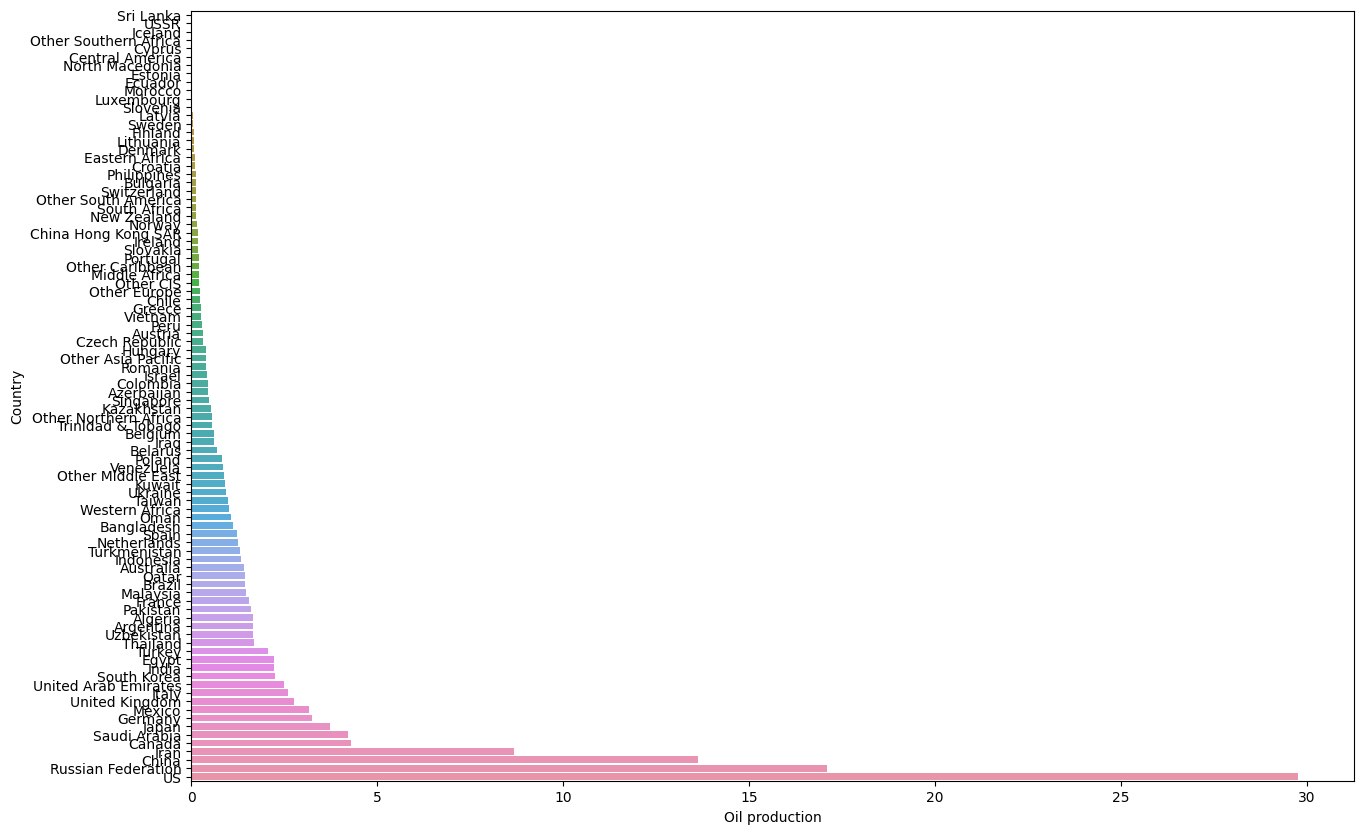

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data=one_year, x=2021, y="Country", dodge=False)
plt.xlabel("Oil production")

In [ ]:
one_year[2021] = one_year[2021].map(lambda x: np.log(1 + x))

Text(0.5, 0, 'Oil production')

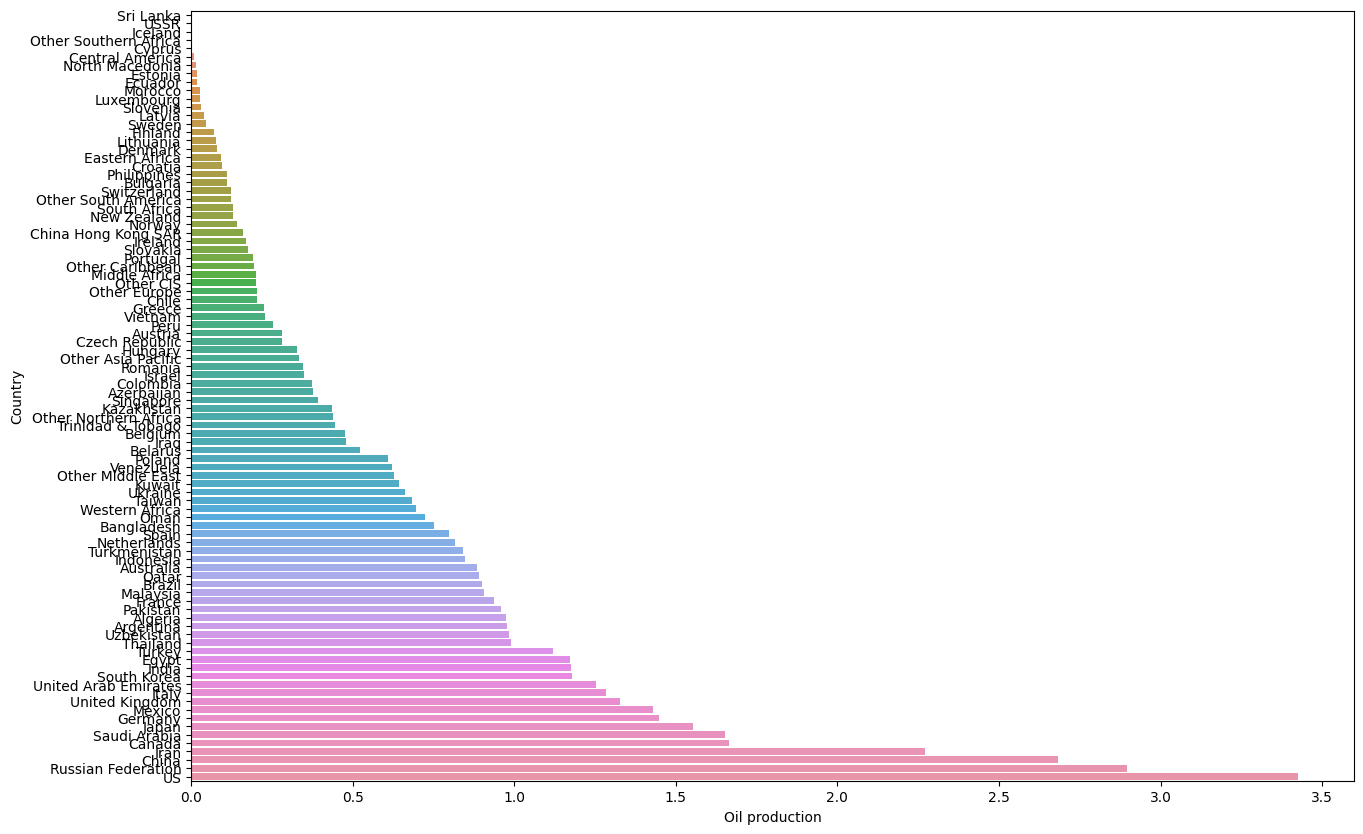

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data=one_year, x=2021, y="Country", dodge=False)
plt.xlabel("Oil production")

In [ ]:
one_year.head()

Country  2021
100              Sri Lanka   0.0
60                    USSR   0.0
32                 Iceland   0.0
84   Other Southern Africa   0.0
23                  Cyprus   0.0

In [ ]:
one_year.describe().T

count      mean       std  min       25%       50%       75%       max
2021   92.0  0.609266  0.658023  0.0  0.128195  0.384758  0.900828  3.426275

In [ ]:
X = np.expand_dims(one_year[2021].values, axis=1)
X.shape

(92, 1)

## KMeans

In [ ]:
best_n_clusters, best_score = find_best_n_clusters(X)

n_cluster: 2, score: 0.6410070774264881
n_cluster: 3, score: 0.6741425357119359
n_cluster: 4, score: 0.6524781909596082
n_cluster: 5, score: 0.6001765259801005
n_cluster: 6, score: 0.5845706977620039
n_cluster: 7, score: 0.567874382129369
n_cluster: 8, score: 0.6087838885966244
n_cluster: 9, score: 0.5902512880039288
n_cluster: 10, score: 0.5938281822862387


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
f"best score: {best_score}, best number of clusters: {best_n_clusters}"

'best score: 0.6741425357119359, best number of clusters: 3'

In [ ]:
kmeans = KMeans(n_clusters=4,
                init='k-means++',
                # n_init=1, # is default
                max_iter=200,
                verbose=1,
                # “lloyd”, “elkan”, “auto”, “full”
                algorithm='full')
one_year['kmeans cluster'] = kmeans.fit_predict(X)

Initialization complete
Iteration 0, inertia 4.343358038034682.
Iteration 1, inertia 2.8371858649693884.
Iteration 2, inertia 2.6744296828545666.
Iteration 3, inertia 2.6518583871649373.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3.091069732276029.
Iteration 1, inertia 2.813166778573625.
Iteration 2, inertia 2.6744296828545666.
Iteration 3, inertia 2.6518583871649373.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 5.078648455955736.
Iteration 1, inertia 3.1196897088837168.
Iteration 2, inertia 3.0653785115273413.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3.4682112592277967.
Iteration 1, inertia 3.1345222378338944.
Iteration 2, inertia 3.0823829735051875.
Iteration 3, inertia 3.0653785115273413.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4.819222893147778.
Iteration 1, inertia 2.8719678383727603.
Iter

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Text(0.5, 1.0, 'Countrys clustering by oil production with KMeans')

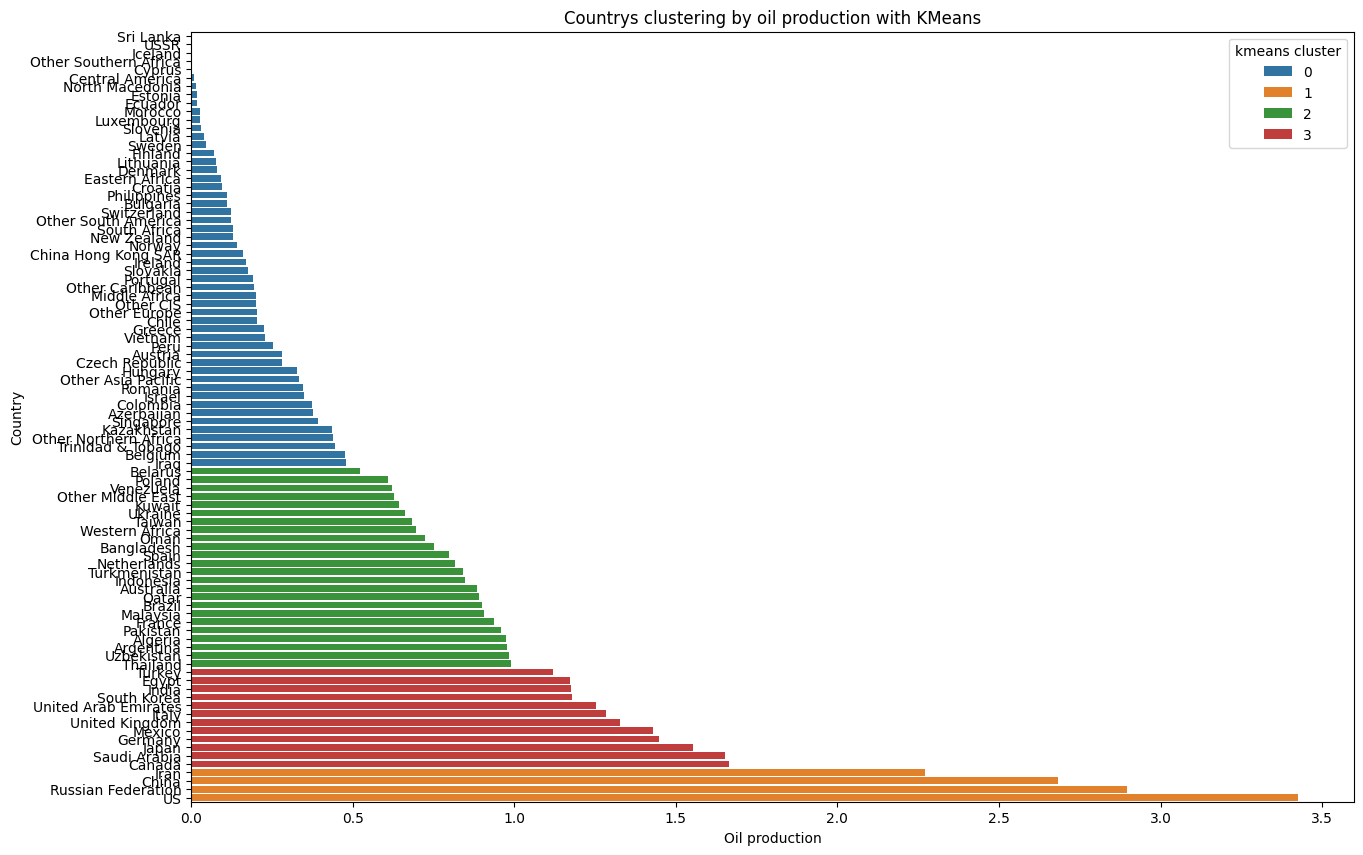

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data=one_year, x=2021, y='Country', hue='kmeans cluster', dodge=False)
plt.xlabel("Oil production")
plt.title("Countrys clustering by oil production with KMeans")

In [ ]:
kmeans.cluster_centers_

array([[0.17826785],
       [2.81869713],
       [0.80199293],
       [1.35499755]])

## AgglomerativeClustering

In [ ]:
# distance_threshold = 1000 # for real data
distance_threshold = 10 # for logarithmic data
agglomerative_clustering = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None)
one_year['agglomerative cluster'] = agglomerative_clustering.fit_predict(X)

Text(0.5, 1.0, 'Countrys clustering by oil production with AgglomerativeClustering')

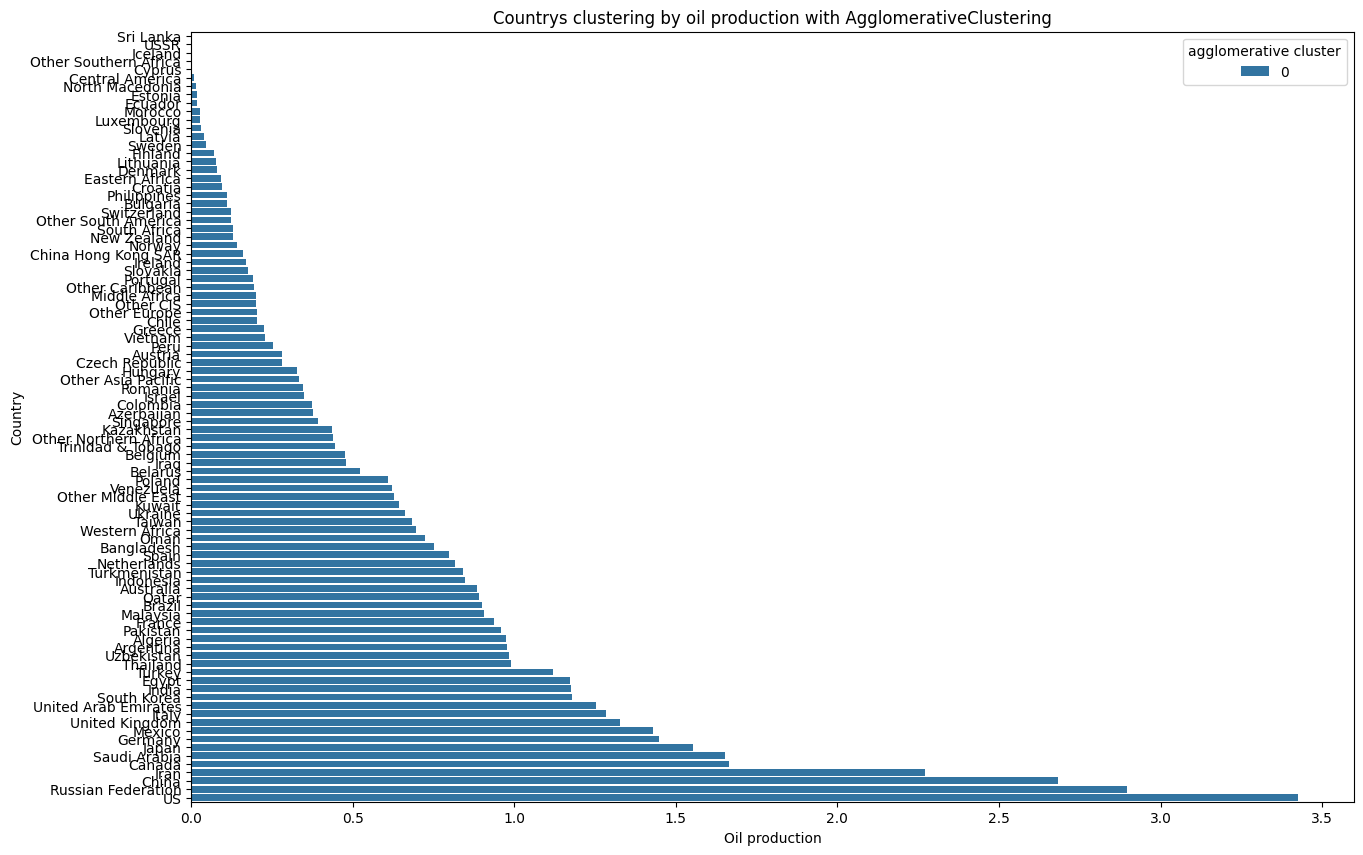

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data=one_year, x=2021, y='Country', hue='agglomerative cluster', dodge=False)
plt.xlabel("Oil production")
plt.title("Countrys clustering by oil production with AgglomerativeClustering")

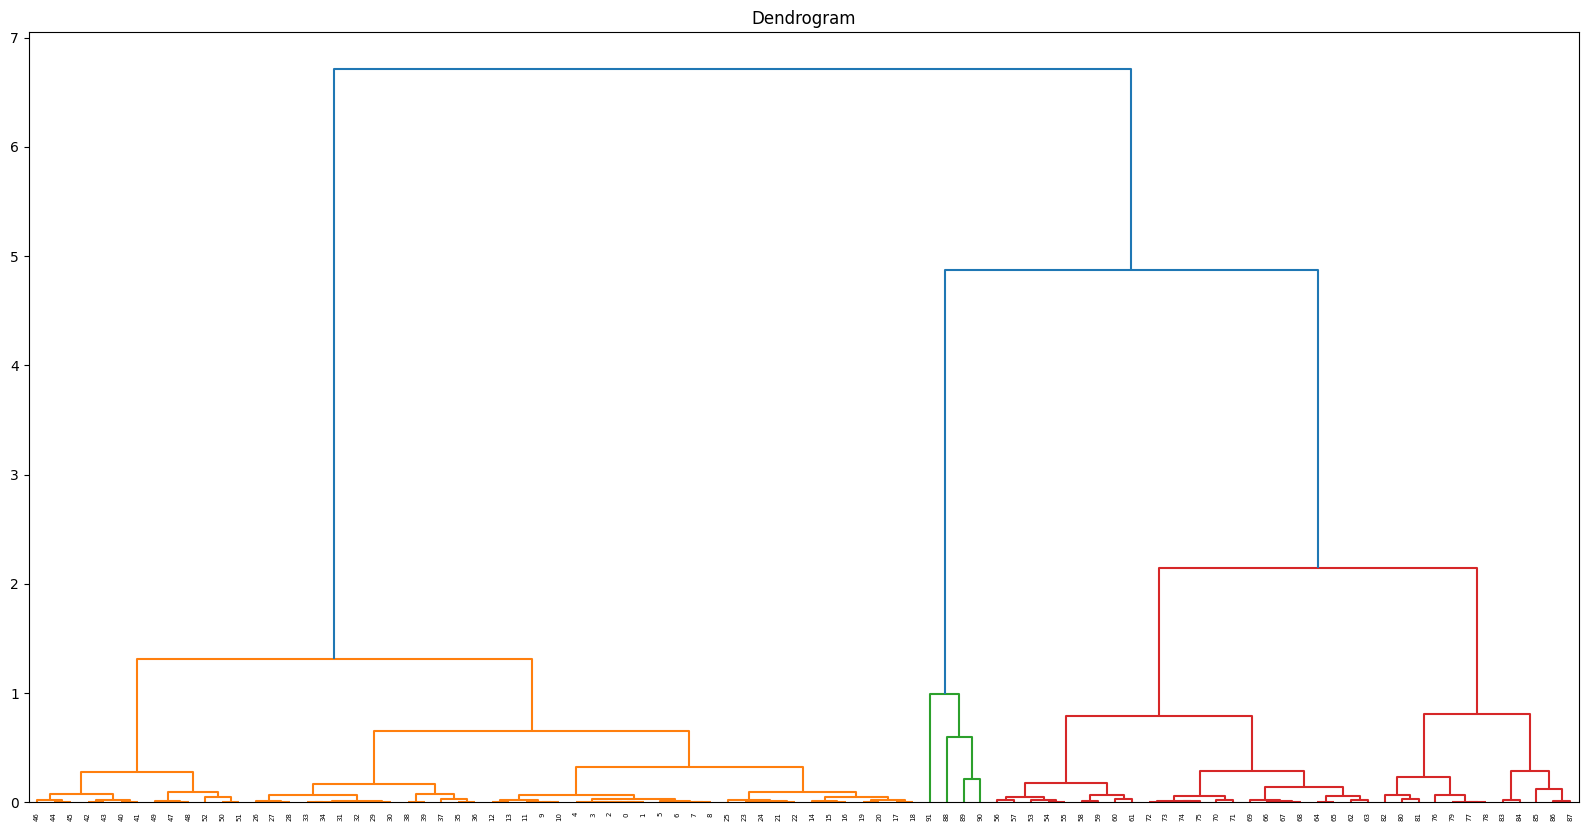

In [ ]:
plt.figure(figsize=(20, 10))
plot_dendrogram(agglomerative_clustering)

## Birch

In [ ]:
birch = Birch(n_clusters=5)
one_year['birch cluster'] = birch.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (5). Decrease the threshold.
  warnings.warn(


Text(0.5, 1.0, 'Countrys clustering by gas сonsumption (EJ) with Birch')

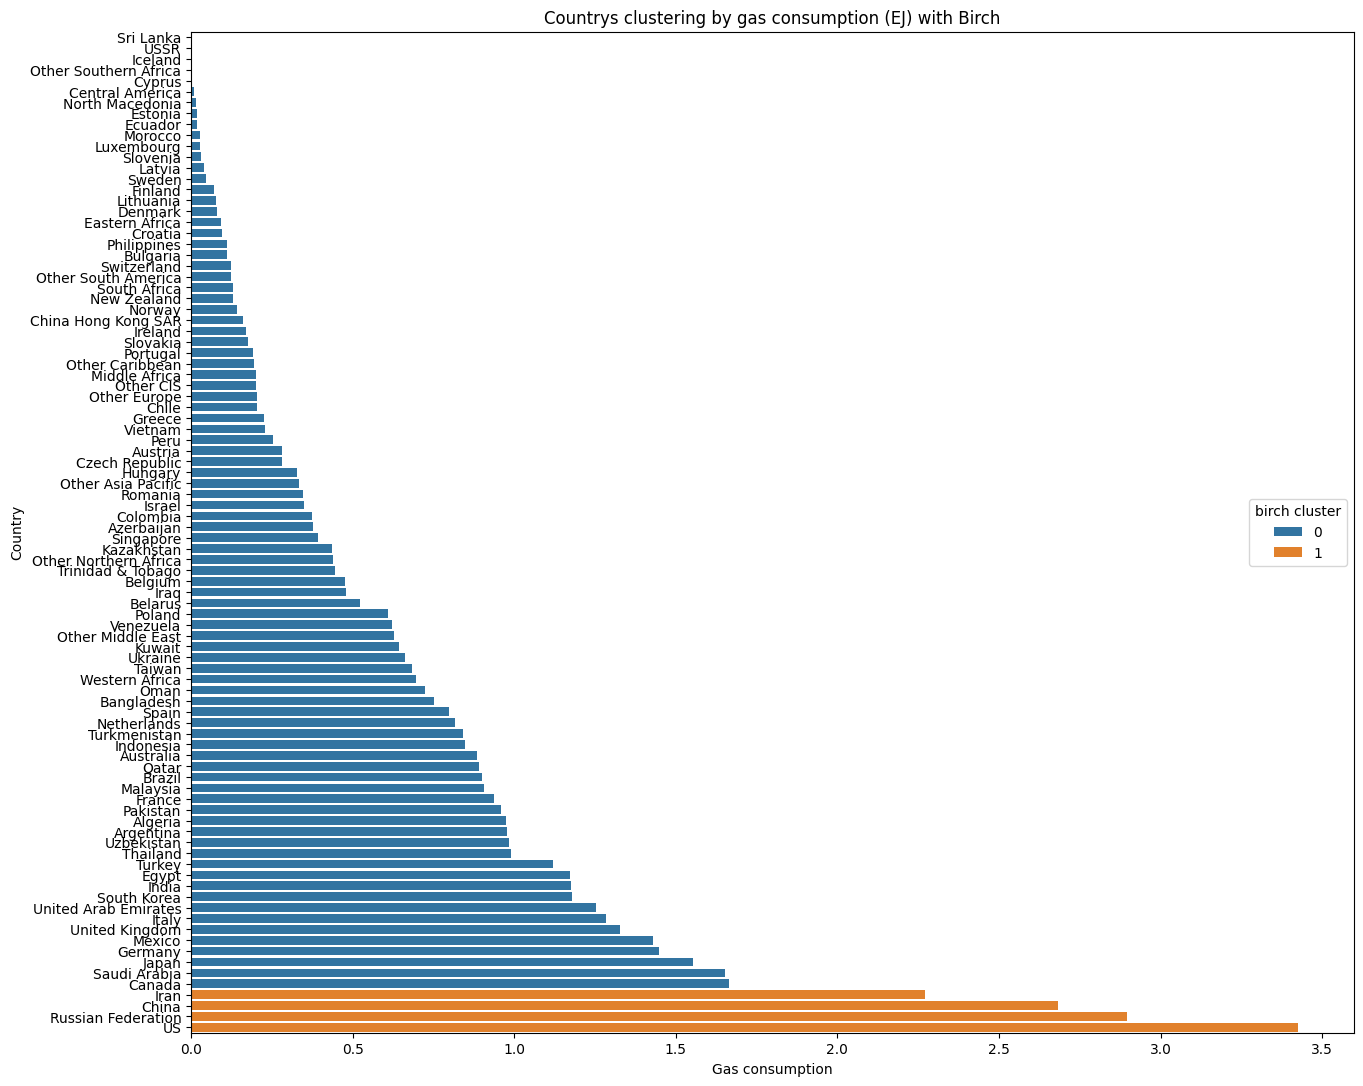

In [ ]:
plt.figure(figsize=(15, 13))
sns.barplot(data=one_year, x=2021, y='Country', hue='birch cluster', dodge=False)
plt.xlabel("Gas сonsumption")
plt.title("Countrys clustering by gas сonsumption (EJ) with Birch")

## DBScan

In [ ]:
dbscan = DBSCAN(eps=25, min_samples=3)
one_year['dbscan cluster'] = dbscan.fit_predict(X)

Text(0.5, 0, 'Oil production')

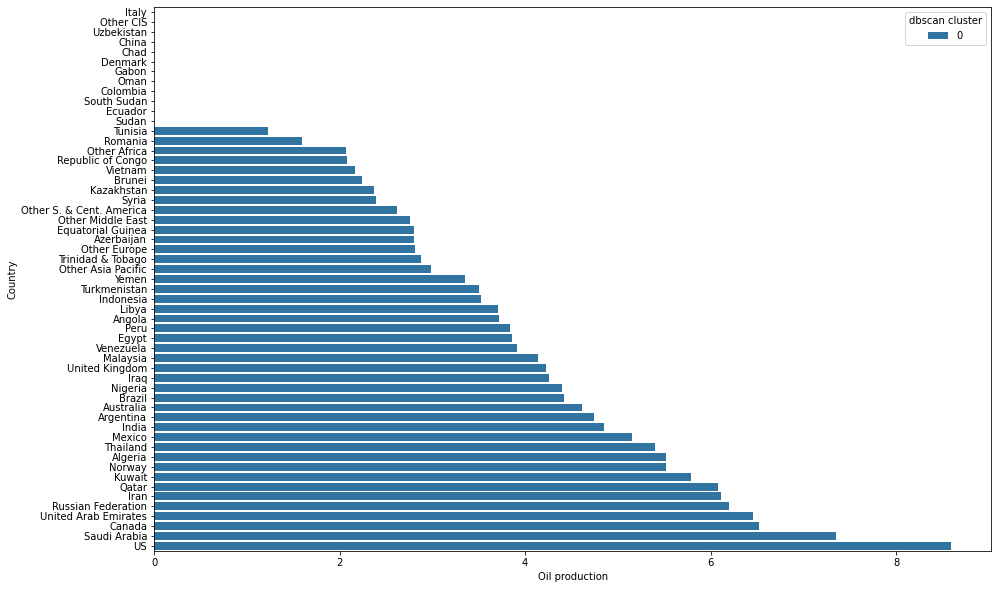

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data=one_year, x=2021, y='Country', hue='dbscan cluster', dodge=False)
plt.xlabel("Oil production")

## Result

In [ ]:
one_year

Country      2021  kmeans cluster  agglomerative cluster  \
17                     Italy  0.000000               1                      1   
29                 Other CIS  0.000000               1                      1   
28                Uzbekistan  0.000000               1                      1   
61                     China  0.000000               1                      1   
46                      Chad  0.000000               1                      1   
16                   Denmark  0.000000               1                      1   
50                     Gabon  0.000000               1                      1   
35                      Oman  0.000000               1                      1   
8                   Colombia  0.000000               1                      1   
53               South Sudan  0.000000               1                      1   
9                    Ecuador  0.000000               1                      1   
54                     Sudan  0.000000               1                      1   
55                   Tunisia  1.228387               1                      0   
19                   Romania  1.597532               3                      0   
56              Other Africa  2.070459               3                      0   
47         Republic of Congo  2.079442               3                      0   
66                   Vietnam  2.165860               3                      0   
60                    Brunei  2.245325               3                      0   
25                Kazakhstan  2.369723               3                      0   
38                     Syria  2.397895               3                      0   
13  Other S. & Cent. America  2.616436               3                      0   
41         Other Middle East  2.760703               3                      0   
49         Equatorial Guinea  2.799106               3                      0   
24                Azerbaijan  2.802894               3                      0   
21              Other Europe  2.812520               3                      0   
11         Trinidad & Tobago  2.876190               3                      0   
67        Other Asia Pacific  2.985744               3                      0   
40                     Yemen  3.355130               0                      0   
27              Turkmenistan  3.507793               0                      0   
63                 Indonesia  3.526723               0                      0   
51                     Libya  3.703162               0                      0   
45                    Angola  3.720527               0                      0   
10                      Peru  3.839960               0                      0   
48                     Egypt  3.860732               0                      0   
12                 Venezuela  3.914764               0                      0   
64                  Malaysia  4.139352               0                      0   
20            United Kingdom  4.222187               0                      0   
33                      Iraq  4.262950               0                      0   
52                   Nigeria  4.398271               0                      0   
7                     Brazil  4.419341               0                      0   
59                 Australia  4.618625               0                      0   
6                  Argentina  4.747125               0                      0   
62                     India  4.854428               0                      0   
2                     Mexico  5.148882               0                      0   
65                  Thailand  5.402463               2                      2   
44                   Algeria  5.519054               2                      2   
18                    Norway  5.520173               2                      2   
34                    Kuwait  5.789078               2                      2   
36                     Qatar  6.080447              

# Clustering with 10 years

## Something about data

In [ ]:
ten_years = df.filter(["Country", 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
ten_years['log Mean'] = np.log(1 + df.iloc[:, 1:].mean(axis=1))
ten_years = ten_years[["Country", "log Mean", 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]]
ten_years.sort_values(by=["log Mean"], inplace=True)

In [ ]:
ten_years.tail()

Country  log Mean         2012         2013         2014  \
2                 Mexico  5.873032   363.186225   359.897796   362.735424   
39  United Arab Emirates  6.080890   479.115437   482.463366   539.488554   
1                 Canada  6.305216   489.922983   514.432420   513.010750   
37          Saudi Arabia  7.248185  1634.996469  1518.118416  1577.355601   
3                     US  7.925313  2408.147541  2605.800000  3014.575342   

           2015         2016         2017         2018         2019  \
2    326.212153   307.187524   279.187466   238.285309   219.831281   
39   613.797222   653.632226   630.503896   604.340316   638.880228   
1    525.183688   595.416513   596.789306   647.438653   682.005041   
37  1577.666752  1717.847608  1717.036262  1728.333342  1687.319243   
3   3342.263014  3509.243169  3783.024658  4369.476712  4824.339726   

           2020         2021  
2    206.227513   171.238840  
39   606.612052   636.555579  
1    660.241090   680.719507  
37  1608.951334  1559.762680  
3   5174.745902  5397.249315

In [ ]:
ten_years.describe().T

count        mean         std  min       25%        50%         75%  \
log Mean   55.0    3.154301    2.181957  0.0  1.479867   3.282259    4.822878   
2012       55.0  159.674191  395.954337  0.0  2.803197  25.000000  115.572943   
2013       55.0  161.349194  410.918049  0.0  4.401437  22.356200  110.216077   
2014       55.0  174.835962  463.007484  0.0  3.999982  25.106849  109.731889   
2015       55.0  182.871966  502.510062  0.0  3.938783  22.806278  115.460676   
2016       55.0  191.656601  530.957410  0.0  4.289230  23.217115  102.043490   
2017       55.0  194.932741  561.058714  0.0  3.751392  26.866414  109.973688   
2018       55.0  205.121510  632.730838  0.0  3.374642  23.821915  103.085883   
2019       55.0  214.439275  687.480791  0.0  3.577313  26.624932  106.867508   
2020       55.0  212.790643  727.711934  0.0  3.448623  20.646031  110.786045   
2021       55.0  219.034257  755.385194  0.0  5.434640  27.649315  107.303504   

                  max  
log Mean     7.925313  
2012      2408.147541  
2013      2605.800000  
2014      3014.575342  
2015      3342.263014  
2016      3509.243169  
2017      3783.024658  
2018      4369.476712  
2019      4824.339726  
2020      5174.745902  
2021      5397.249315

In [ ]:
X = ten_years[[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]].values
# X = np.log(1 + X)

# for i in range(len(X)):
#     great = X[i].max()

#     if great != 0:
#         X[i] = X[i] / great
#         # X[i] = savgol_filter(X[i], 5, 2)

X.shape

(55, 10)

<ipython-input-8-a1a50f0eb682>:10: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot((x - x_mean), (y - y_mean).T) / np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))


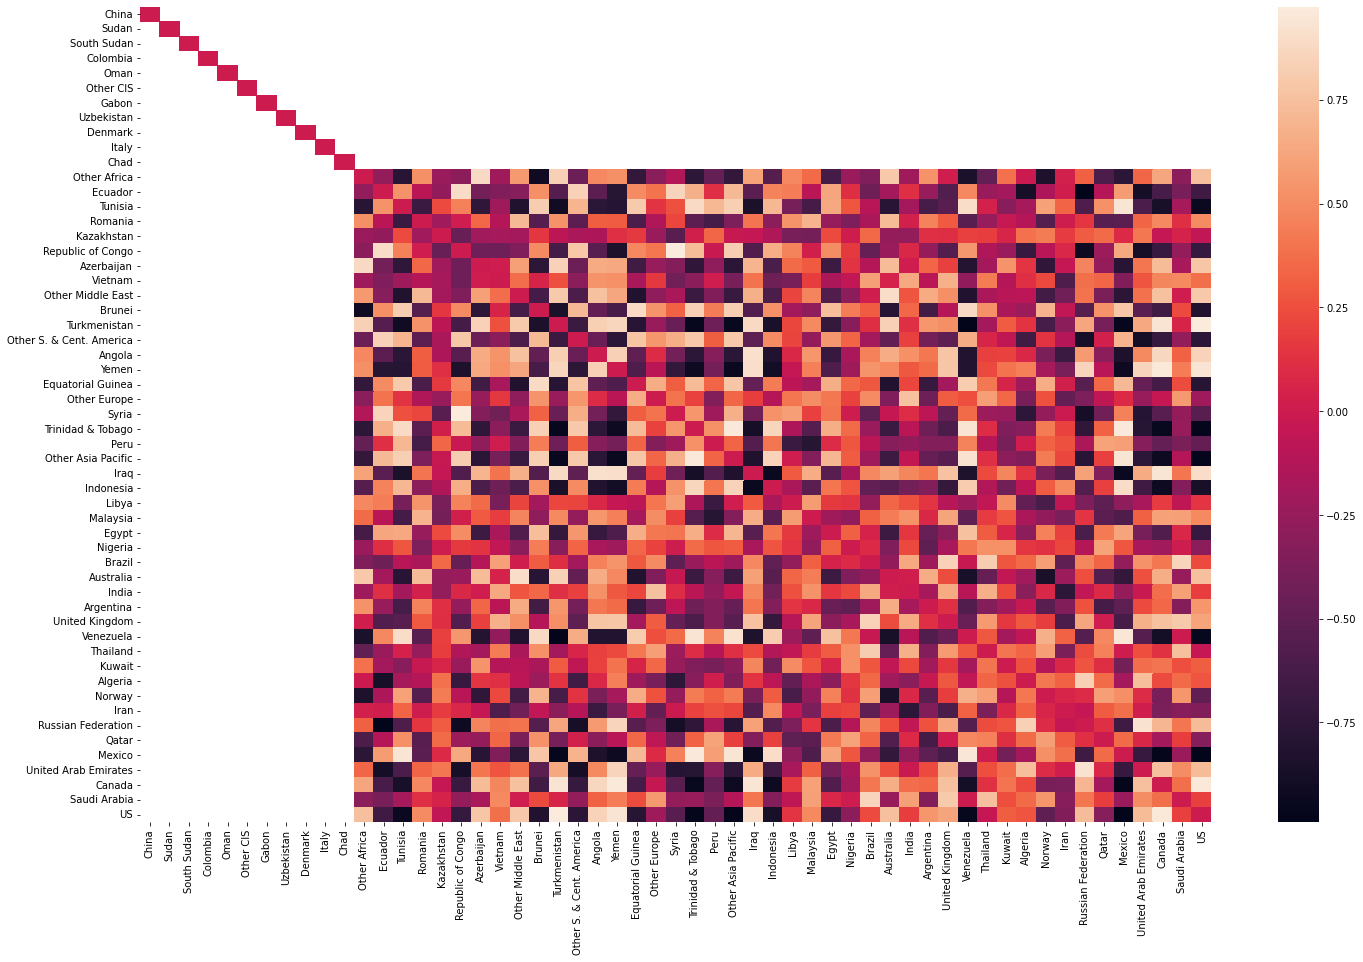

In [ ]:
corr_matrix = get_corr_matrix(X)
plt.figure(figsize=(24, 15))
sns.heatmap(corr_matrix, xticklabels=ten_years["Country"], yticklabels=ten_years["Country"])

In [ ]:
# size = len(X)
# x = ten_years.columns.values[2:]

# plt.figure(figsize=(20, 450))

# for count in range(size):
#     plt.subplot(size, 1, count + 1)
#     plt.plot(x, X[count])
#     plt.xlabel('Year')
#     plt.ylabel('Oil production')

## KMeans

In [ ]:
best_n_clusters, best_score = find_best_n_clusters(X)

n_cluster: 2, score: 0.9272164230932658
n_cluster: 3, score: 0.8651193334981246
n_cluster: 4, score: 0.7812592578423111
n_cluster: 5, score: 0.7496178566374914
n_cluster: 6, score: 0.6316809663219606
n_cluster: 7, score: 0.6417332306748111
n_cluster: 8, score: 0.6266877498305568
n_cluster: 9, score: 0.5831003901502997
n_cluster: 10, score: 0.5673608074498477


In [ ]:
f"best score: {best_score}, best number of clusters: {best_n_clusters}"

'best score: 0.9272164230932658, best number of clusters: 2'

In [ ]:
kmeans = KMeans(n_clusters=best_n_clusters)
ten_years['kmeans cluster'] = kmeans.fit_predict(X)

Text(0.5, 1.0, 'Countrys clustering by oil production with KMeans')

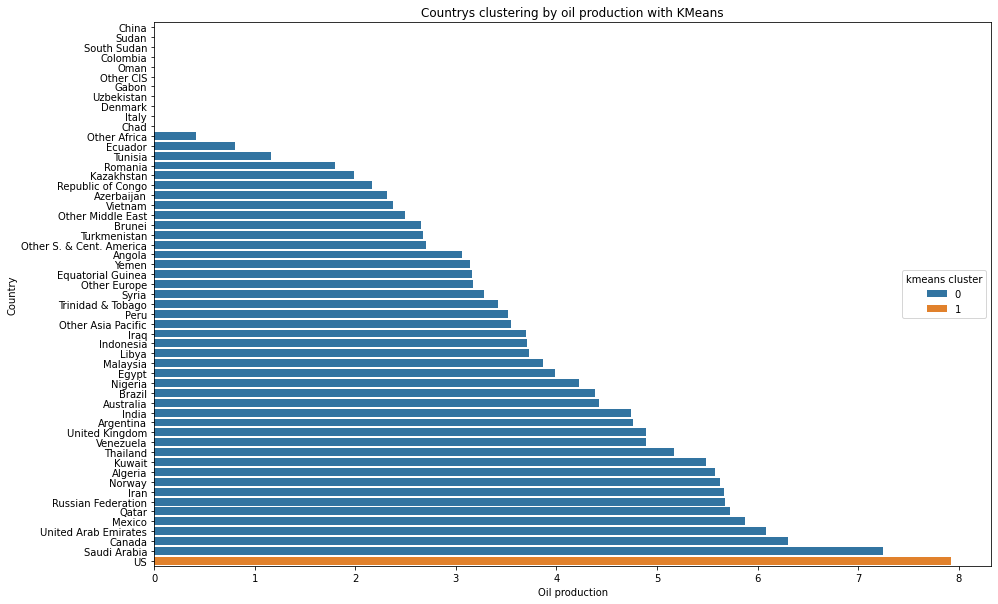

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data=ten_years, x="log Mean", y='Country', hue='kmeans cluster', dodge=False)
plt.xlabel("Oil production")
plt.title("Countrys clustering by oil production with KMeans")

## Custom meashure kmeans

In [ ]:
for i in range(1000):
    ten_years['custom kmeans cluster'] = custom_kmeans(X, n_clusters=3, n_iter=50, ro=manhattan)

Выходные данные были обрезаны до нескольких последних строк (5000).
  1.34840030e+02 1.27307333e+02]
 [1.07266885e+02 1.04432154e+02 1.05463778e+02 1.13921351e+02
  9.90869796e+01 1.10429728e+02 1.01833357e+02 1.11777566e+02
  1.20036648e+02 1.14252466e+02]
 [6.17851470e+01 5.49778981e+01 6.24050079e+01 6.02977384e+01
  8.15332177e+01 9.19516595e+01 8.95895494e+01 9.88206503e+01
  8.75968661e+01 6.71824270e+01]
 [1.23879000e+02 1.16000000e+02 1.14000000e+02 1.17000000e+02
  1.05000000e+02 1.04000000e+02 8.84477679e+01 7.95860616e+01
  5.17247064e+01 4.91372217e+01]
 [2.32148136e+02 2.24938216e+02 2.31044176e+02 2.32650103e+02
  2.30974764e+02 2.46519154e+02 2.47001761e+02 2.46386644e+02
  2.18652305e+02 2.20952471e+02]
 [2.82882568e+02 2.86960685e+02 2.75991644e+02 2.87828356e+02
  2.89718443e+02 3.05031781e+02 3.13105616e+02 2.98501151e+02
  2.56931205e+02 3.25711775e+02]
 [2.16374863e+02 2.10134795e+02 2.60221370e+02 2.67785205e+02
  2.61221858e+02 2.53610959e+02 2.51672329e+02 2.474

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Выходные данные были обрезаны до нескольких последних строк (5000).
  8.15332177e+01 9.19516595e+01 8.95895494e+01 9.88206503e+01
  8.75968661e+01 6.71824270e+01]
 [1.23879000e+02 1.16000000e+02 1.14000000e+02 1.17000000e+02
  1.05000000e+02 1.04000000e+02 8.84477679e+01 7.95860616e+01
  5.17247064e+01 4.91372217e+01]
 [2.32148136e+02 2.24938216e+02 2.31044176e+02 2.32650103e+02
  2.30974764e+02 2.46519154e+02 2.47001761e+02 2.46386644e+02
  2.18652305e+02 2.20952471e+02]
 [2.82882568e+02 2.86960685e+02 2.75991644e+02 2.87828356e+02
  2.89718443e+02 3.05031781e+02 3.13105616e+02 2.98501151e+02
  2.56931205e+02 3.25711775e+02]
 [2.16374863e+02 2.10134795e+02 2.60221370e+02 2.67785205e+02
  2.61221858e+02 2.53610959e+02 2.51672329e+02 2.47413699e+02
  2.33299454e+02 2.48398904e+02]
 [3.05878377e+02 3.05327610e+02 3.24006969e+02 3.37861216e+02
  3.49023660e+02 3.51450120e+02 3.35281860e+02 2.99387409e+02
  2.88141334e+02 2.48678128e+02]
 [4.12040301e+02 4.17632603e+02 4.41153562e+02 4.605

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Countrys clustering by oil production with KMeans')

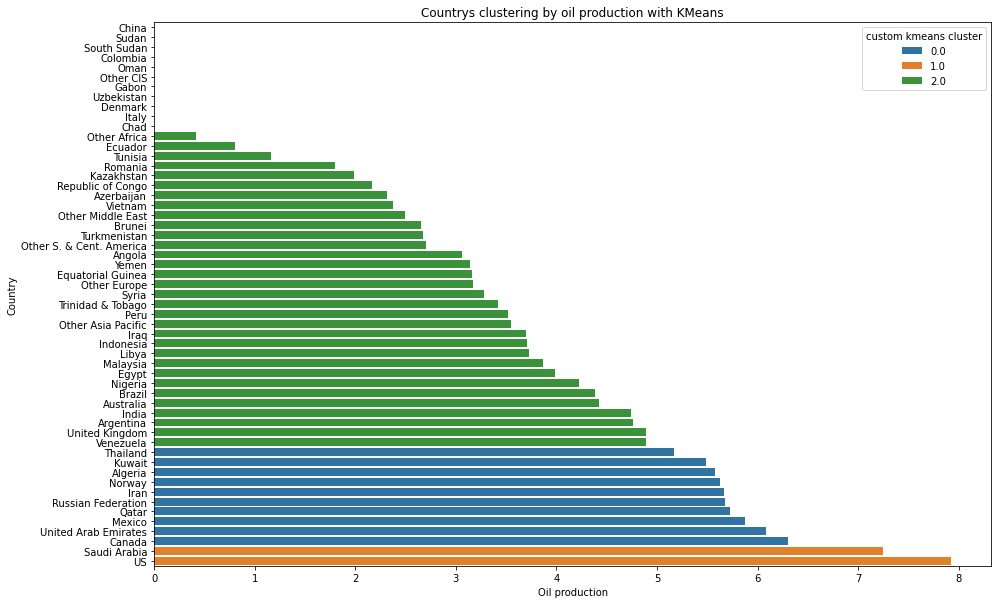

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data=ten_years, x="log Mean", y='Country', hue='custom kmeans cluster', dodge=False)
plt.xlabel("Oil production")
plt.title("Countrys clustering by oil production with KMeans")

## Agglomerative Clustering

In [ ]:
agglomerative_clustering = AgglomerativeClustering(distance_threshold=10, n_clusters=None)
ten_years['agglomerative cluster'] = agglomerative_clustering.fit_predict(X)

Text(0.5, 1.0, 'Countrys clustering by oil production with agglomerative cluster')

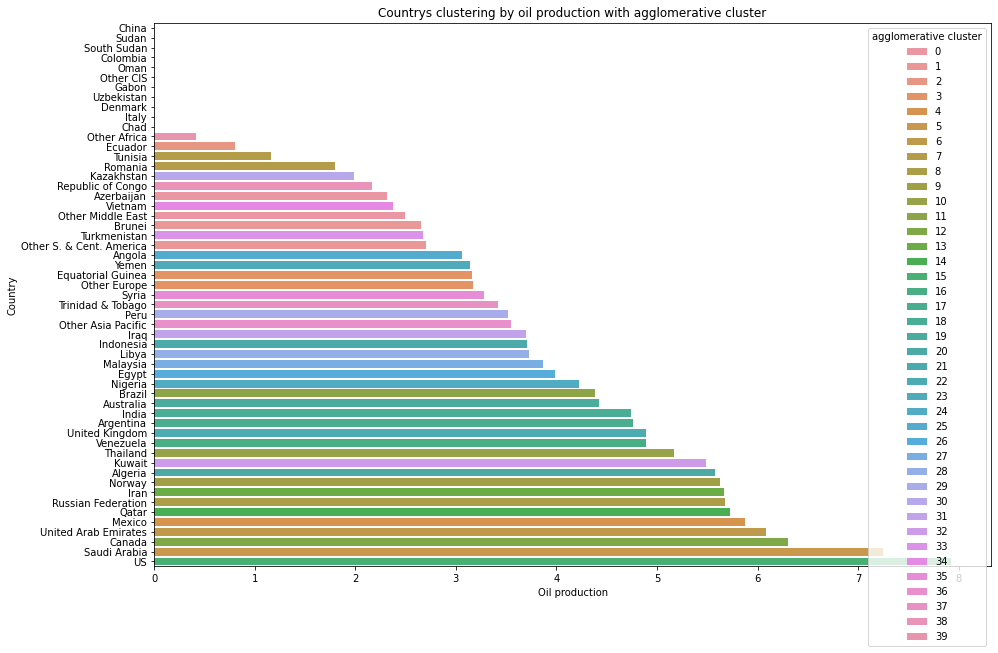

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data=ten_years, x="log Mean", y='Country', hue='agglomerative cluster', dodge=False)
plt.xlabel("Oil production")
plt.title("Countrys clustering by oil production with agglomerative cluster")

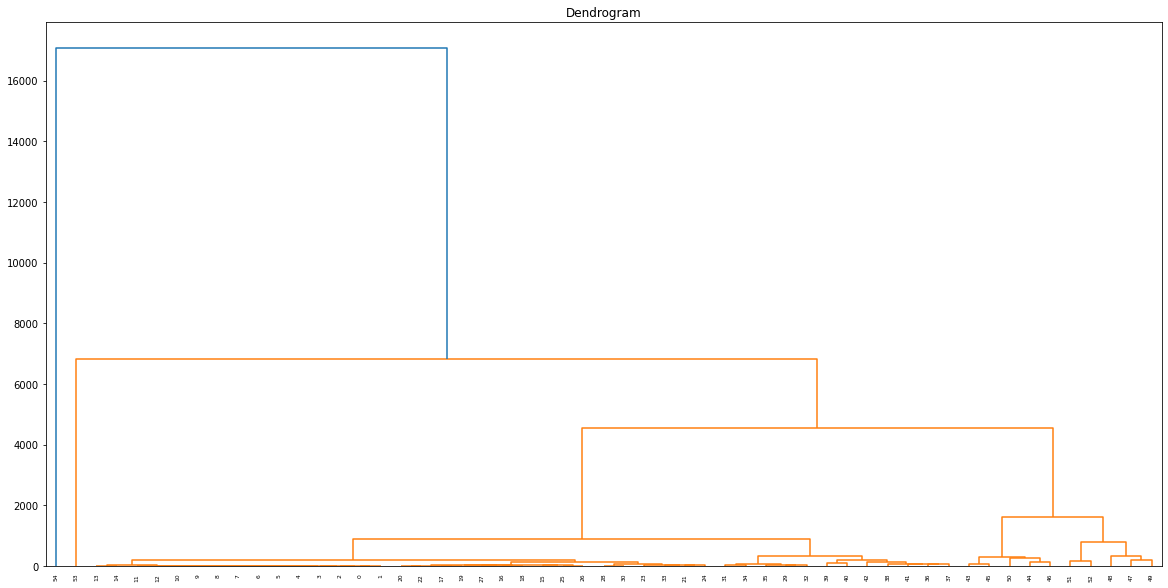

In [ ]:
plt.figure(figsize=(20, 10))
plot_dendrogram(agglomerative_clustering)

## Birch

In [ ]:
birch = Birch(n_clusters=4)
ten_years['birch cluster'] = birch.fit_predict(X)

Text(0.5, 1.0, 'Countrys clustering by oil production with Birch')

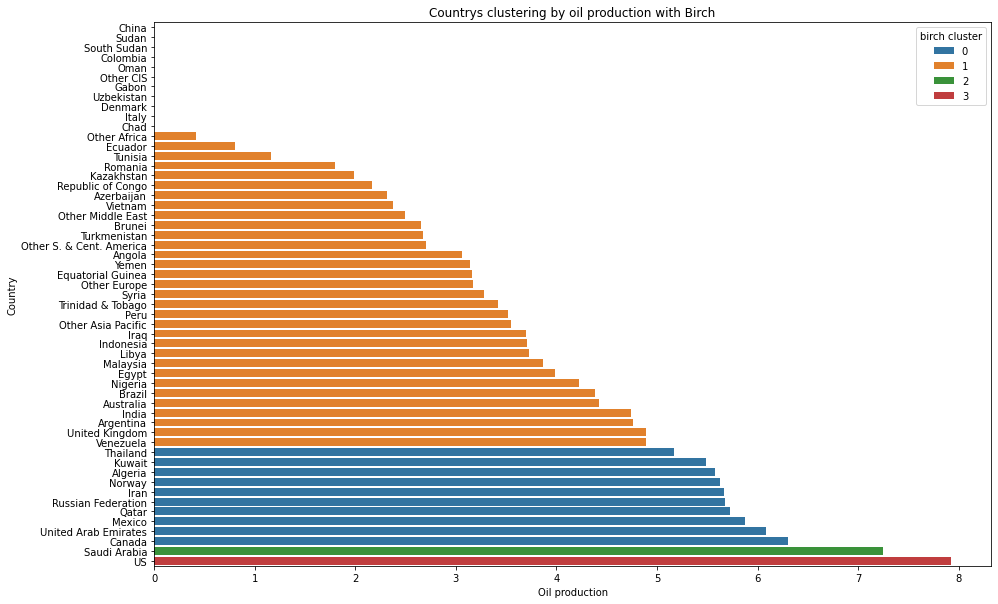

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data=ten_years, x="log Mean", y='Country', hue='birch cluster', dodge=False)
plt.xlabel("Oil production")
plt.title("Countrys clustering by oil production with Birch")

## DBScan

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
ten_years['dbscan cluster'] = dbscan.fit_predict(X)

Text(0.5, 1.0, 'Countrys clustering by oil production with DBScan')

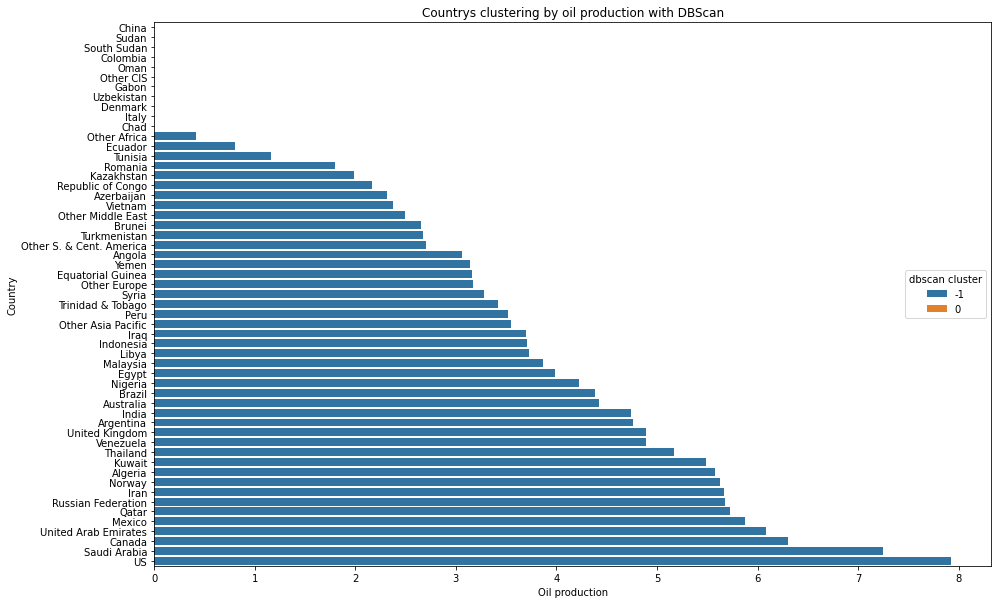

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data=ten_years, x="log Mean", y='Country', hue='dbscan cluster', dodge=False)
plt.xlabel("Oil production")
plt.title("Countrys clustering by oil production with DBScan")